In [41]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping

In [21]:
folderpath=r"C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy"
os.chdir(folderpath)
print("current directory:",os.getcwd())

current directory: C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy


In [22]:
print("C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing")


C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing


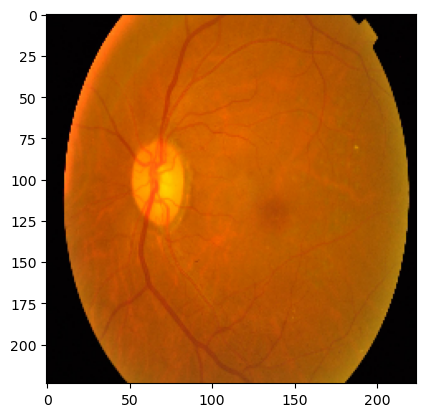

In [23]:
img = image.load_img("C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\testing\\Mild\\0a61bddab956.png")
plt.imshow(img)

In [25]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\train\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('C:\\Users\\santhosh\\OneDrive\\Desktop\\diabetic retinopathy\\validation\\',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [26]:
!pip install -q efficientnet

In [27]:
import efficientnet.tfkeras as efn

In [28]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.00001
        return lr
    elif epoch<=30:
        lr=0.00001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [29]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [30]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=10,verbose=1)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - acc: 0.5761 - loss: 1.2688 - val_acc: 0.5882 - val_loss: 1.0908 - learning_rate: 1.0000e-04
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - acc: 0.7441 - loss: 0.6852 - val_acc: 0.6389 - val_loss: 0.9838 - learning_rate: 1.0000e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - acc: 0.7947 - loss: 0.5701 - val_acc: 0.6731 - val_loss: 1.0027 - learning_rate: 1.0000e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - acc: 0.7876 - loss: 0.5344 - val_acc: 0.6963 - val_loss: 0.8275 - learning_rate: 1.0000e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - acc: 0.8144 - loss: 0.4970 - val_acc: 0.7196 - val_loss: 0.7054 - learning_rate: 1.0000e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - acc: 0.8281 - loss: 0.4380 - val_acc: 0.7674 - val_loss: 0.6723 - learning_rate: 1.0000e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - acc: 0.8463 - loss: 0.4220 - val_acc: 0.7907 - val_loss: 0.5610 - learning_ra

In [31]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(25,20), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

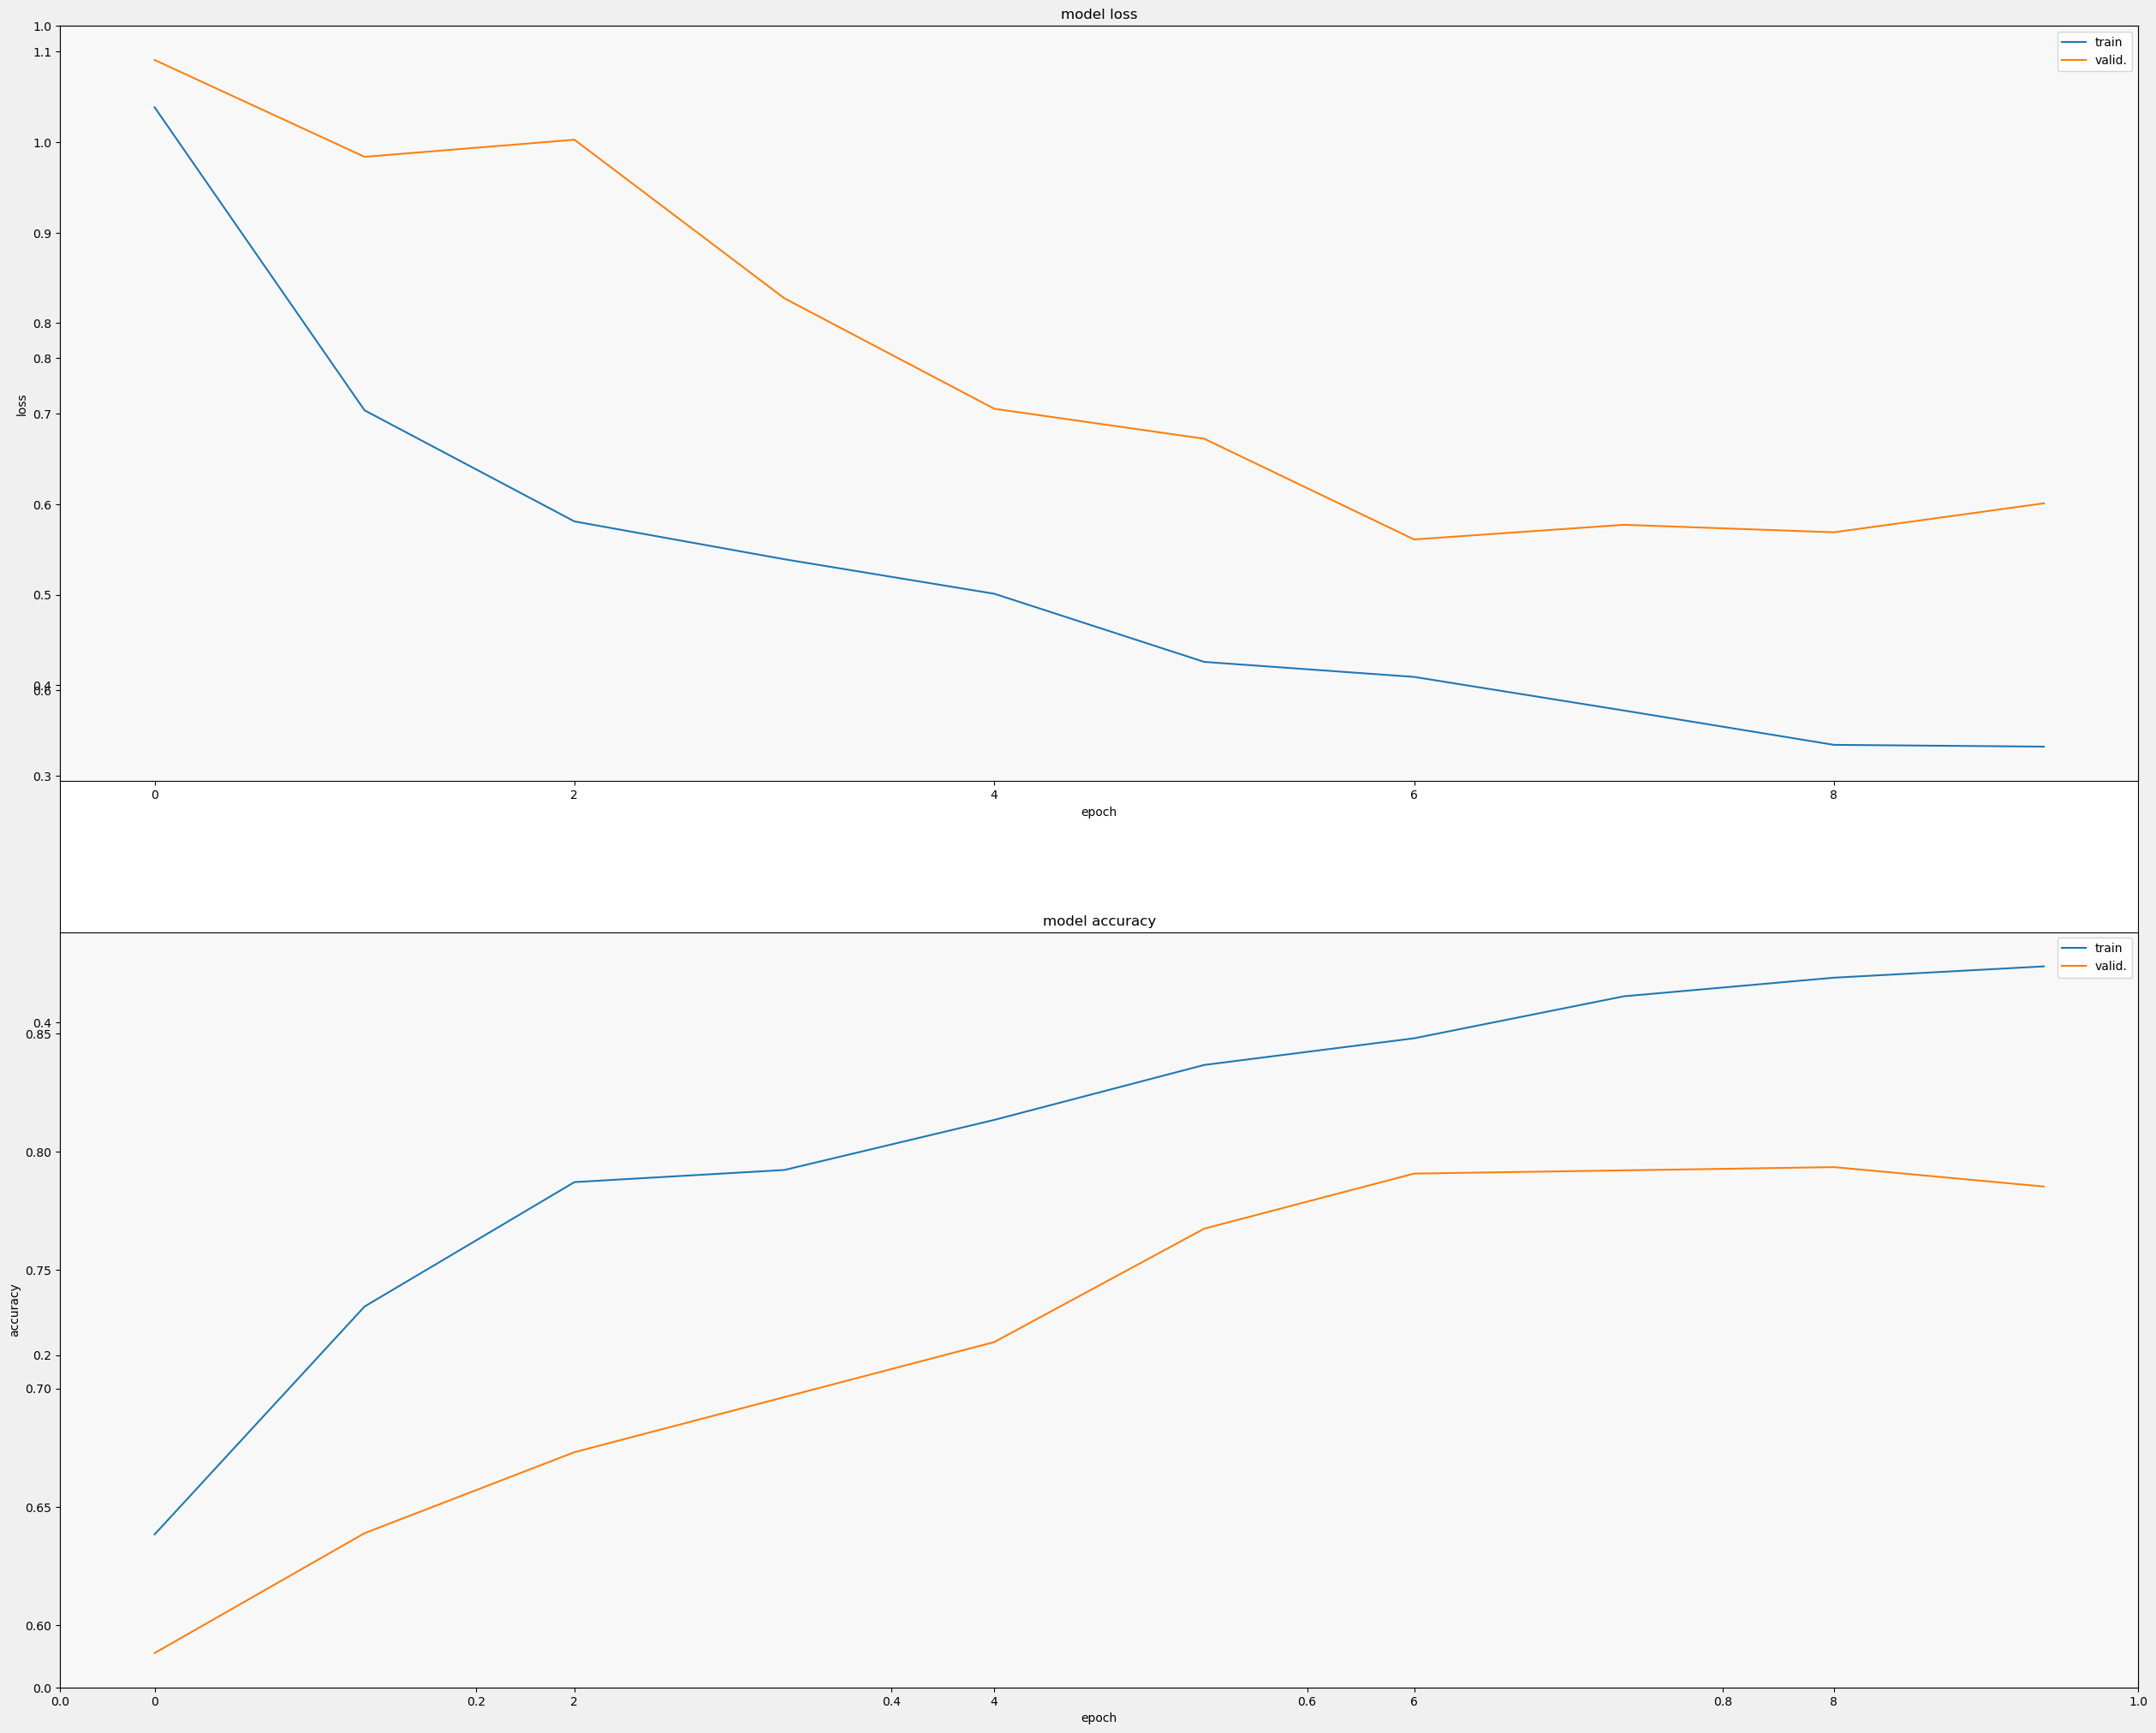

In [32]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

In [39]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    directory=r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
result=model.evaluate(test_generator)

Found 3662 images belonging to 5 classes.
115/115 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - acc: 0.8631 - loss: 0.4672


In [44]:
accuracy = result[1] 
precision = precision_score(y_true, y_pred, average='weighted') 
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
loss=result[0]


print(f"Model accuracy: {accuracy * 100:.2f}%")
print(f"Model loss: {loss * 100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")

Model accuracy: 89.95%
Model loss: 30.66%
Precision: 89.77%
Recall: 89.95%
F1-Score: 89.55%


In [43]:
y_pred = np.argmax(model.predict(test_generator), axis=-1) 
y_true = test_generator.classes 

correct_predictions = np.sum(y_pred == y_true)
total_samples = len(y_true)

print(f"Number of correctly classified samples: {correct_predictions} out of {total_samples}")
print(f"Accuracy (in numbers): {correct_predictions}")

115/115 ━━━━━━━━━━━━━━━━━━━━ 32s 264ms/step
Number of correctly classified samples: 3294 out of 3662
Accuracy (in numbers): 3294


In [38]:
def predict_new(path):
    img = cv2.imread(path)
    predictions=["Mild","Moderate","NO_DR","Proliferate_DR","Severe"] 
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0

    predict=model.predict(np.array([image]))
    pred=np.argmax(predict,axis=1)
    
    print(f"Predicted: {predictions[pred[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predicted: Proliferate_DR


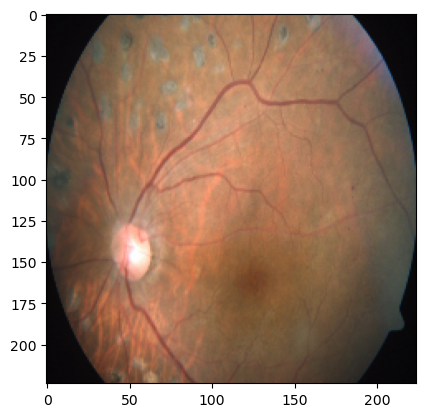

In [52]:
predict_new(r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\train\Proliferate_DR\2fe06bedb2c4.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted: Moderate


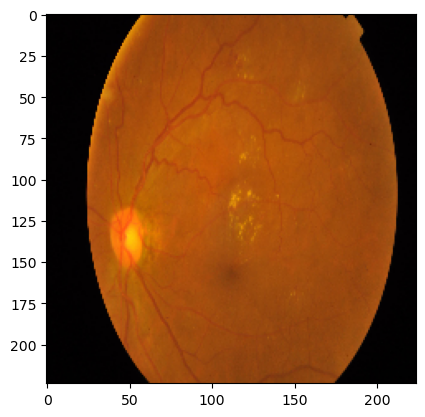

In [49]:
predict_new(r'C:\Users\santhosh\OneDrive\Desktop\diabetic retinopathy\train\Moderate\00a8624548a9.png')

In [46]:
from tensorflow.keras.models import load_model
model.save(r'C:\Users\santhosh\OneDrive\Desktop\myeffb0_model.h5')
loadedmodel=load_model(r'C:\Users\santhosh\OneDrive\Desktop\myeffb0_model.h5')